# Лаборатораня работа №2: Обработка признаков (часть 1).

In [25]:
#Датасет содержит данные о кредитах на покупку электроники, которые были одобрены Tinkoff.ru. 
import pandas as pd
import numpy as np
#from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from warnings import simplefilter

simplefilter('ignore')

In [2]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv('credit_train.csv', encoding='cp1251', sep=';')

In [3]:
# смотрим на первые пять строк
data.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,NaN,NaN,UMN,"59998,00",10,1.6,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,NaN,MAR,UMN,"10889,00",6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,3,M,32.0,MAR,SPC,"10728,00",12,1.1,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,4,F,27.0,NaN,SPC,"12009,09",12,1.1,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,5,M,45.0,NaN,SPC,NaN,10,1.1,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0


## 1) Обработка пропусков в данных

In [4]:
#проверяем типы данных и заполненность столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  object 
 2   age                   170743 non-null  float64
 3   marital_status        170743 non-null  object 
 4   job_position          170746 non-null  object 
 5   credit_sum            170744 non-null  object 
 6   credit_month          170746 non-null  int64  
 7   tariff_id             170746 non-null  float64
 8   score_shk             170739 non-null  object 
 9   education             170741 non-null  object 
 10  living_region         170554 non-null  object 
 11  monthly_income        170741 non-null  float64
 12  credit_count          161516 non-null  float64
 13  overdue_credit_count  161516 non-null  float64
 14  open_account_flg      170746 non-null  int64  
dtype

In [5]:
#удаляем столбец с номером клиента (так как он незначимый) 
# и с регионом проживания (так как он нуждается в серьезной предобработке)
data.drop(['client_id', 'living_region'], axis=1, inplace=True)

In [6]:
# анализируем столбец marital_status, смотрим, какое значение в нем является самым частым 
data['marital_status'].describe()

count     170743
unique         5
top          MAR
freq       93954
Name: marital_status, dtype: object

In [7]:
# анализируем столбец education, смотрим, какое в нем самое частое значение
data['education'].describe()

count     170741
unique         5
top          SCH
freq       87537
Name: education, dtype: object

In [8]:
# дозаполняем нечисловые столбцы с пропусками самыми часто встречающимися значениями
data['marital_status'].fillna('MAR', inplace=True)
data['education'].fillna('SCH', inplace=True)

In [9]:
# дозаполняем числовые столбцы с пропусками медианными значениями
data['age'].fillna(data['age'].median(), inplace=True)
data['credit_count'].fillna(data['credit_count'].median(), inplace=True)
data['overdue_credit_count'].fillna(data['overdue_credit_count'].median(), inplace=True)

In [10]:
#меняем в столбцах 'credit_sum', 'score_shk'  запятые на точки  и преобразуем их в числовой  формат
for i in ['credit_sum', 'score_shk']:
    data[i] = data[i].str.replace(',', '.').astype('float')

In [11]:
# дозаполняем ставшие теперь числовыми столбцы 'credit_sum', 'score_shk'   медианными значениями
data['score_shk'].fillna(data['score_shk'].median(), inplace=True)
data['monthly_income'].fillna(data['monthly_income'].median(), inplace=True)
data['credit_sum'].fillna(data['credit_sum'].median(), inplace=True)

In [12]:
# смотрим, что получилось
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                170746 non-null  object 
 1   age                   170746 non-null  float64
 2   marital_status        170746 non-null  object 
 3   job_position          170746 non-null  object 
 4   credit_sum            170746 non-null  float64
 5   credit_month          170746 non-null  int64  
 6   tariff_id             170746 non-null  float64
 7   score_shk             170746 non-null  float64
 8   education             170746 non-null  object 
 9   monthly_income        170746 non-null  float64
 10  credit_count          170746 non-null  float64
 11  overdue_credit_count  170746 non-null  float64
 12  open_account_flg      170746 non-null  int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 16.9+ MB


In [ ]:
#Удаление пустых строк
#df = df[df['EPS'].notna()]

## 2) Кодирование категориальных признаков

In [13]:
category_cols = ['gender', 'job_position', 'education', 'marital_status']

In [14]:
print("Количество уникальных значений\n")
for col in category_cols:
    print(f'{col}: {data[col].unique().size}')

Количество уникальных значений

gender: 2
job_position: 18
education: 5
marital_status: 5


In [15]:
# кодируем нечисловые столбцы методом дамми-кодирования
data = pd.concat([data, 
                      pd.get_dummies(data['gender'], prefix="gender"),
                      pd.get_dummies(data['job_position'], prefix="job_position"),
                      pd.get_dummies(data['education'], prefix="education"),
                      pd.get_dummies(data['marital_status'], prefix="marital_status")],
                     axis=1)

In [16]:
#удаляем старые нечисловые столбцы, вместо них уже появились новые числовые
data.drop(['gender','job_position','education','marital_status'], axis=1, inplace=True)

In [17]:
data.head()

,age,credit_sum,credit_month,tariff_id,score_shk,monthly_income,credit_count,overdue_credit_count,open_account_flg,gender_F,...,education_ACD,education_GRD,education_PGR,education_SCH,education_UGR,marital_status_CIV,marital_status_DIV,marital_status_MAR,marital_status_UNM,marital_status_WID
0,34.0,59998.00,10,1.6,0.461599,30000.0,1.0,1.0,0,False,...,False,True,False,False,False,False,False,True,False,False
1,34.0,10889.00,6,1.1,0.461599,35000.0,2.0,0.0,0,True,...,False,False,False,True,False,False,False,True,False,False
2,32.0,10728.00,12,1.1,0.461599,35000.0,5.0,0.0,0,False,...,False,False,False,True,False,False,False,True,False,False
3,27.0,12009.09,12,1.1,0.461599,35000.0,2.0,0.0,0,True,...,False,False,False,True,False,False,False,True,False,False
4,45.0,21229.00,10,1.1,0.421385,35000.0,1.0,0.0,0,False,...,False,False,False,True,False,False,False,True,False,False


## 3) Нормализация числовых признаков

In [19]:
data_num = data[['age', 'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'monthly_income', 'credit_count', 'overdue_credit_count']]

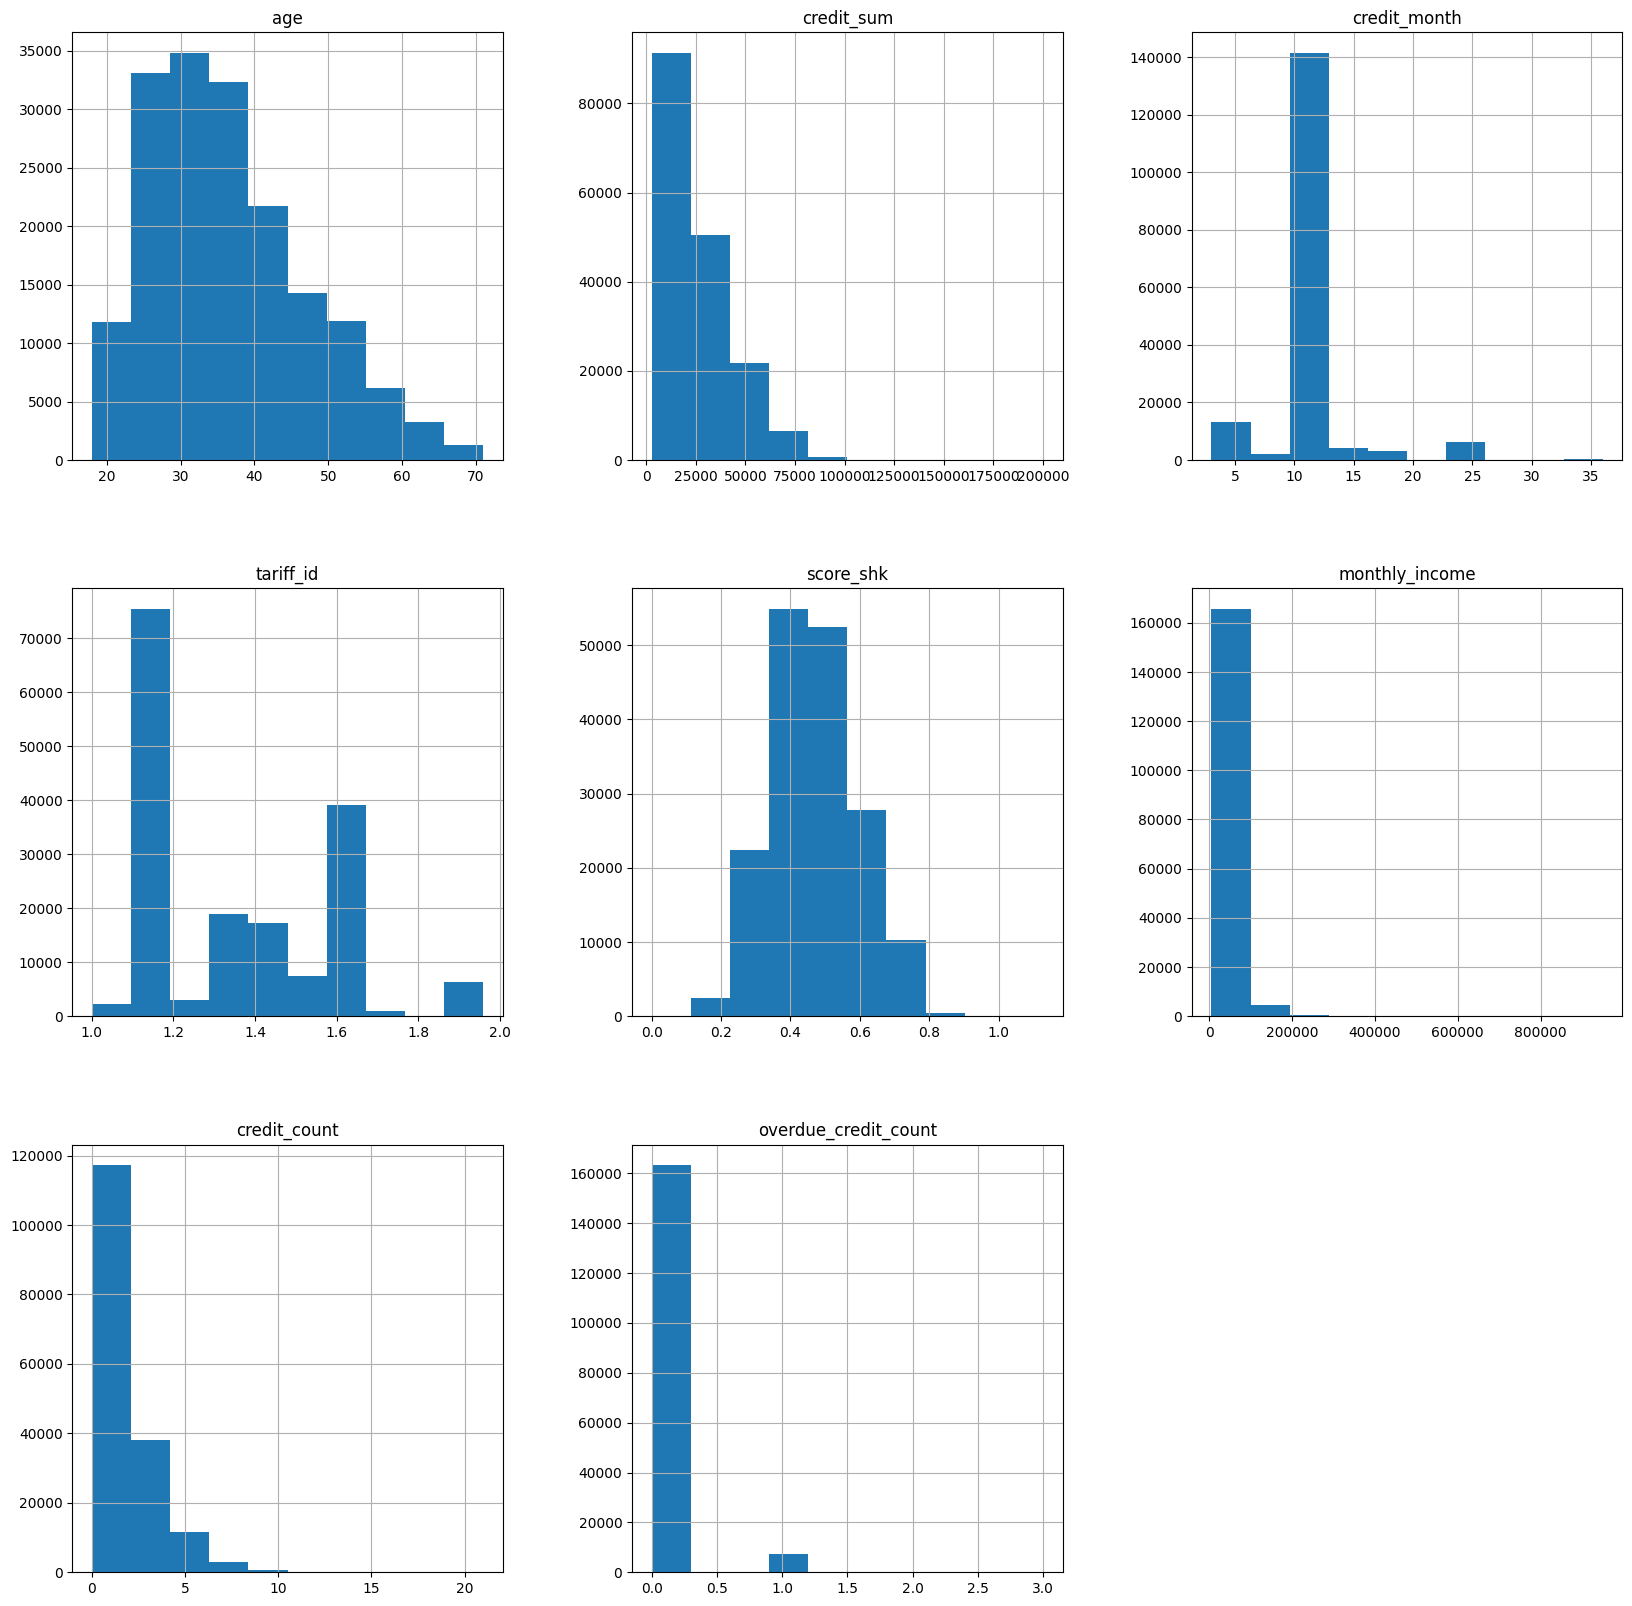

In [20]:
data_num.hist(figsize=(20,20))
plt.show()

In [21]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [22]:
data_num.describe()

,age,credit_sum,credit_month,tariff_id,score_shk,monthly_income,credit_count,overdue_credit_count
count,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000
mean,36.497218,26095.040543,10.980749,1.323900,0.469473,40138.445674,2.101508,0.043579
std,10.545957,16234.787554,3.536698,0.235813,0.124263,25044.022734,1.728598,0.206014
min,18.000000,2736.000000,3.000000,1.000000,0.000000,5000.000000,0.000000,0.000000
25%,28.000000,14908.000000,10.000000,1.100000,0.379549,25000.000000,1.000000,0.000000
50%,34.000000,21229.000000,10.000000,1.320000,0.461599,35000.000000,2.000000,0.000000
75%,43.000000,32068.000000,12.000000,1.600000,0.552396,50000.000000,3.000000,0.000000
max,71.000000,200000.000000,36.000000,1.960000,1.128291,950000.000000,21.000000,3.000000


## Исходное распределение

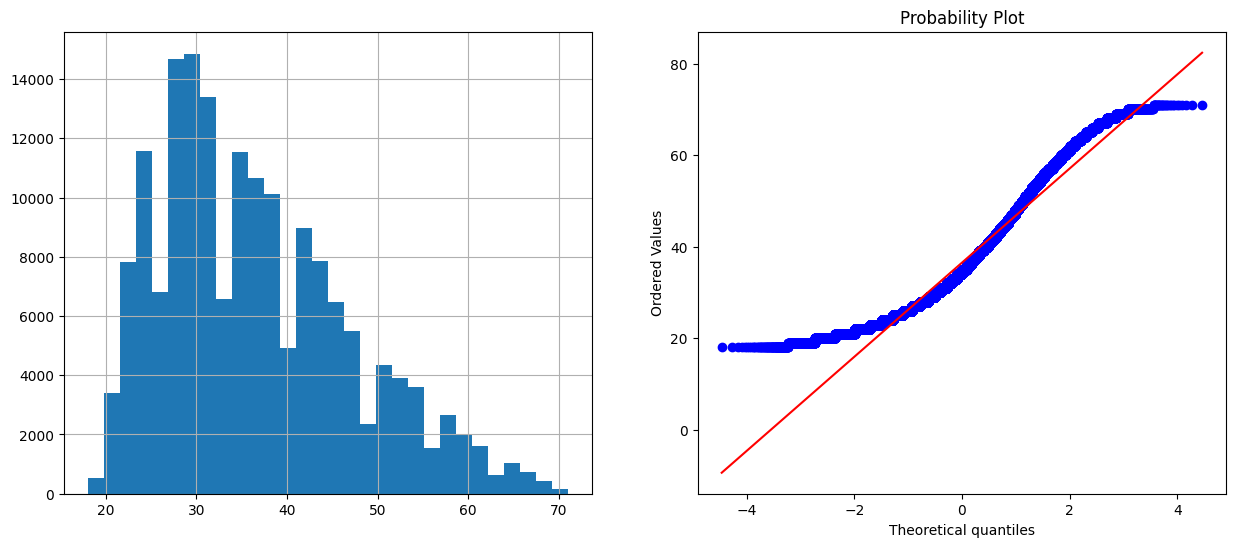

In [26]:
diagnostic_plots(data_num, 'age')

## Логарифмическое преобразование

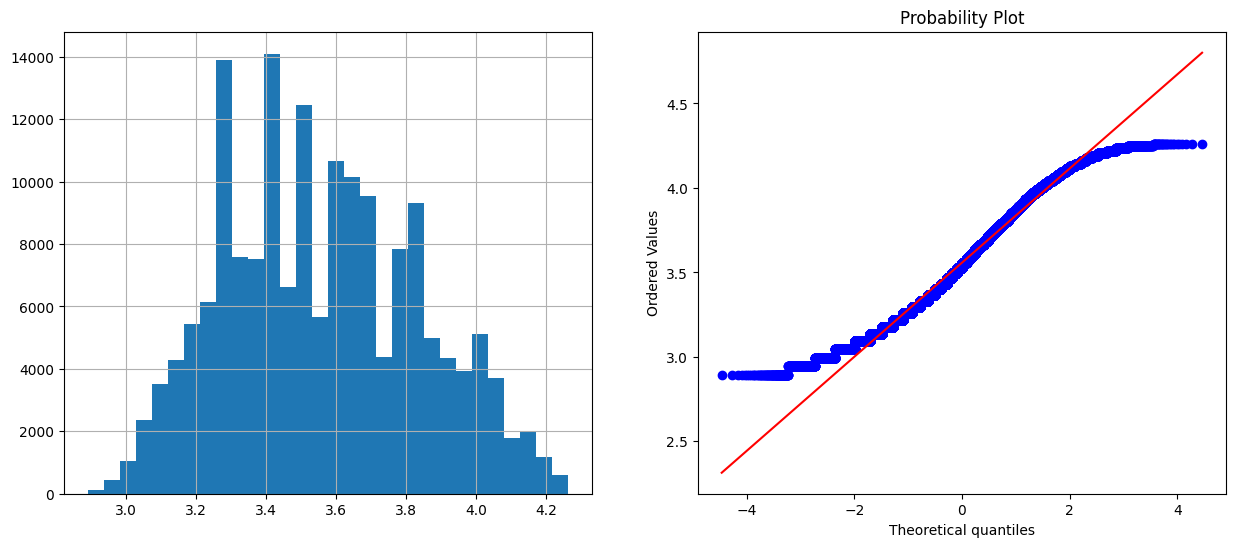

In [29]:
data_test = pd.DataFrame(data=np.log(data_num['age']))
diagnostic_plots(data_test, 'age')

## Обратное преобразование

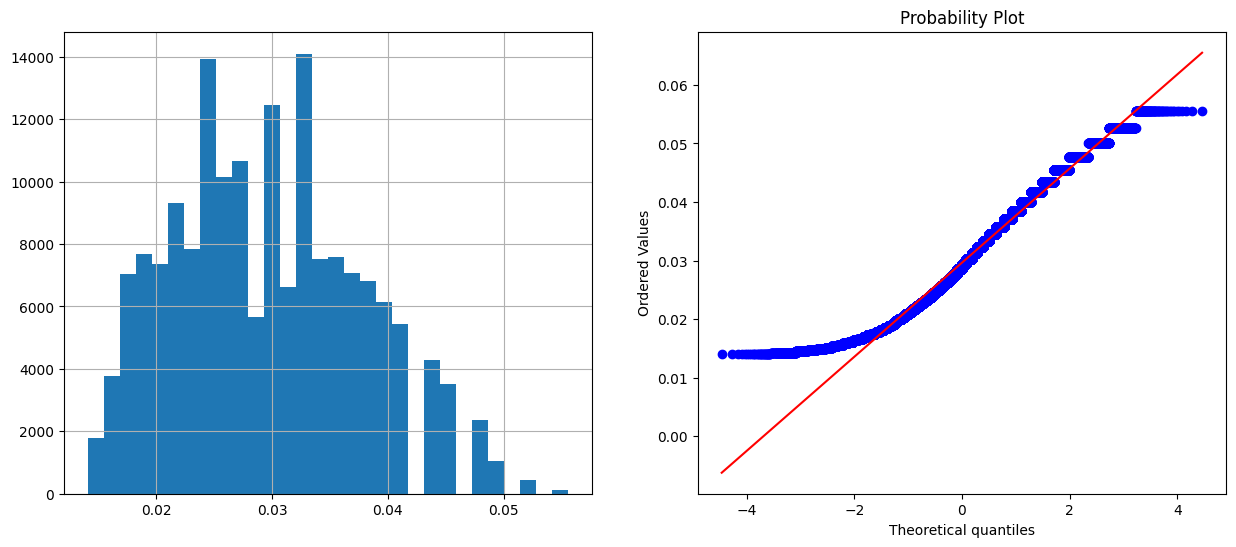

In [31]:
data_test['age'] = 1 / (data_num['age'])
diagnostic_plots(data_test, 'age')

## Квадратный корень

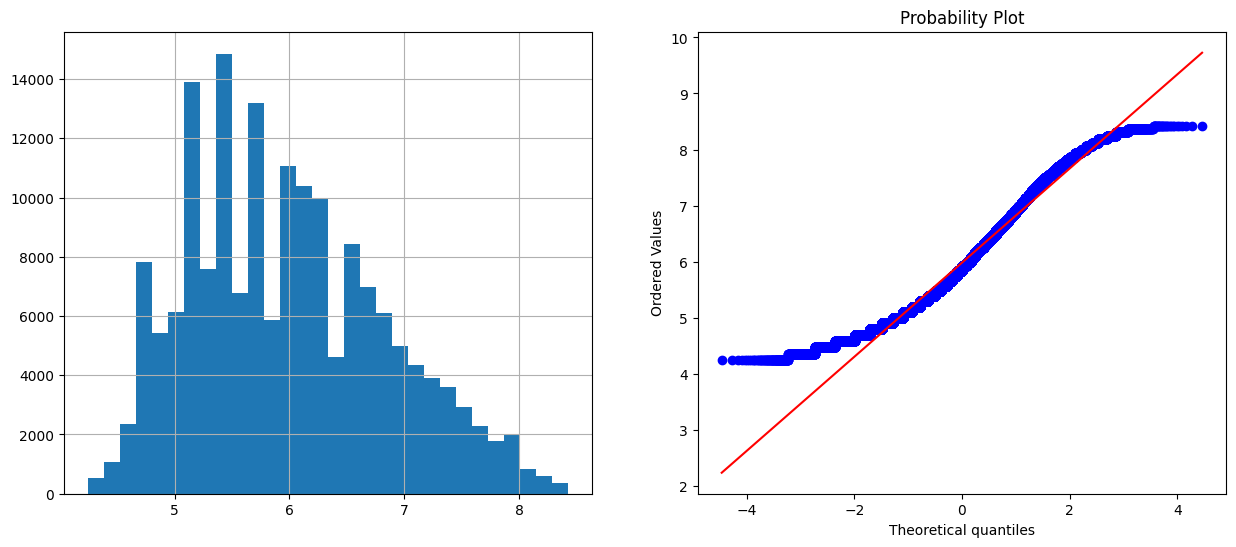

In [32]:
data_test['age'] = data_num['age']**(1/2) 
diagnostic_plots(data_test, 'age')

## Возведение в степень

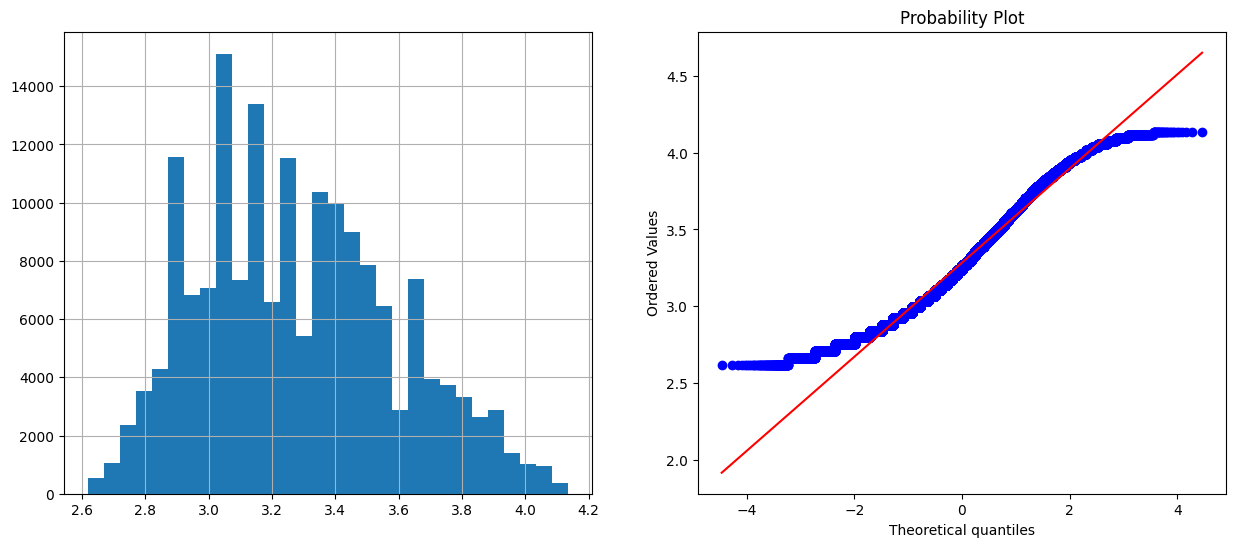

In [37]:
data_test['age'] = data_num['age']**(0.333)
diagnostic_plots(data_test, 'age')

## Преобразование Бокса-Кокса

Оптимальное значение λ = -0.31936473367513285


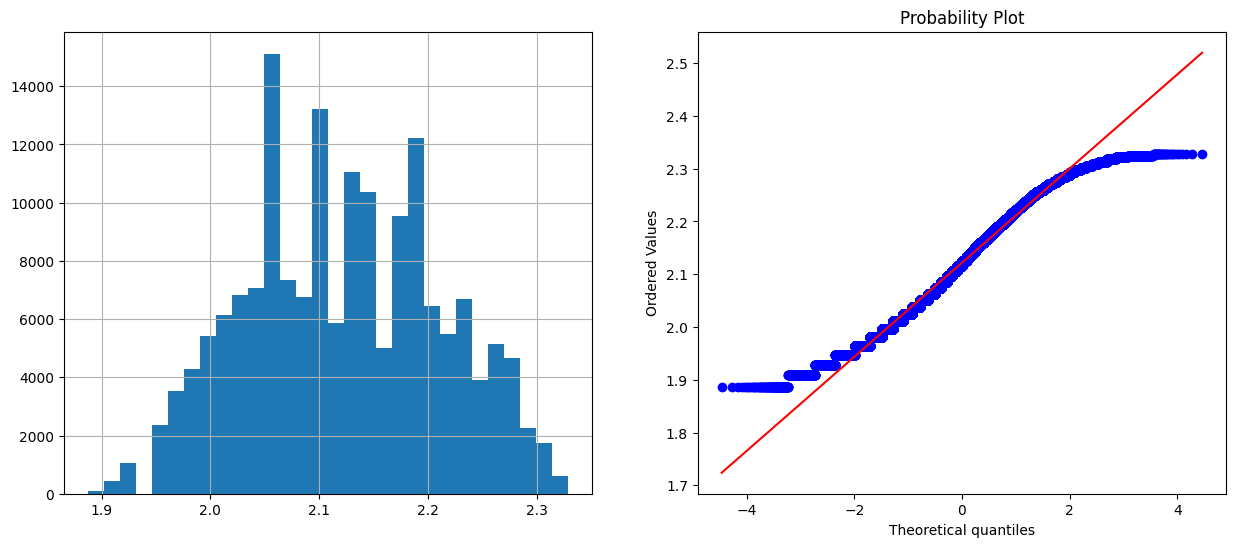

In [38]:
data_test['age'], param = stats.boxcox(data_num['age']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data_test, 'age')

## Преобразование Йео-Джонсона

Оптимальное значение λ = -0.3539227779251753


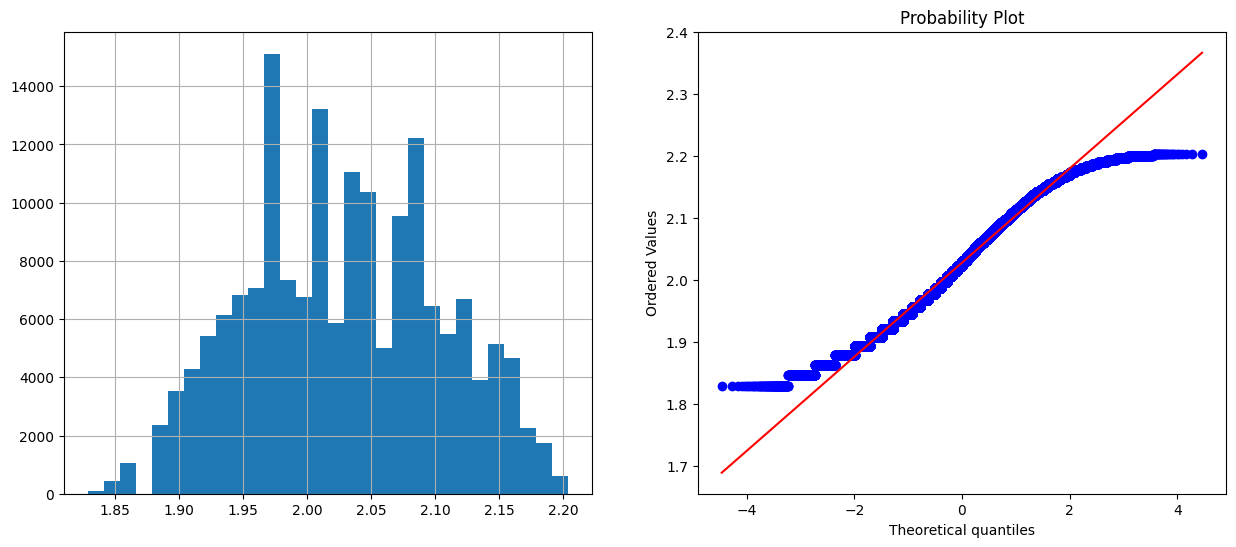

In [39]:
# Необходимо преобразовать данные к действительному типу
data_test['age'] = data_num['age'].astype('float')
data_test['age'], param = stats.yeojohnson(data_test['age']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data_test, 'age')

## Исходное распределение

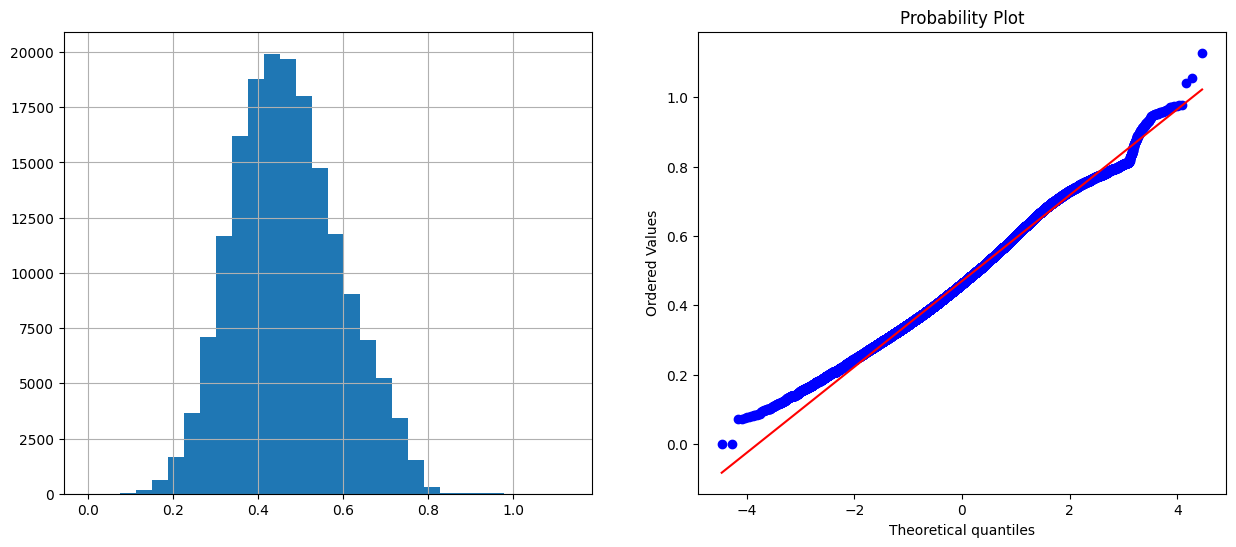

In [41]:
diagnostic_plots(data_num, 'score_shk')

## Преобразование Йео-Джонсона

Оптимальное значение λ = -0.12155608078906655


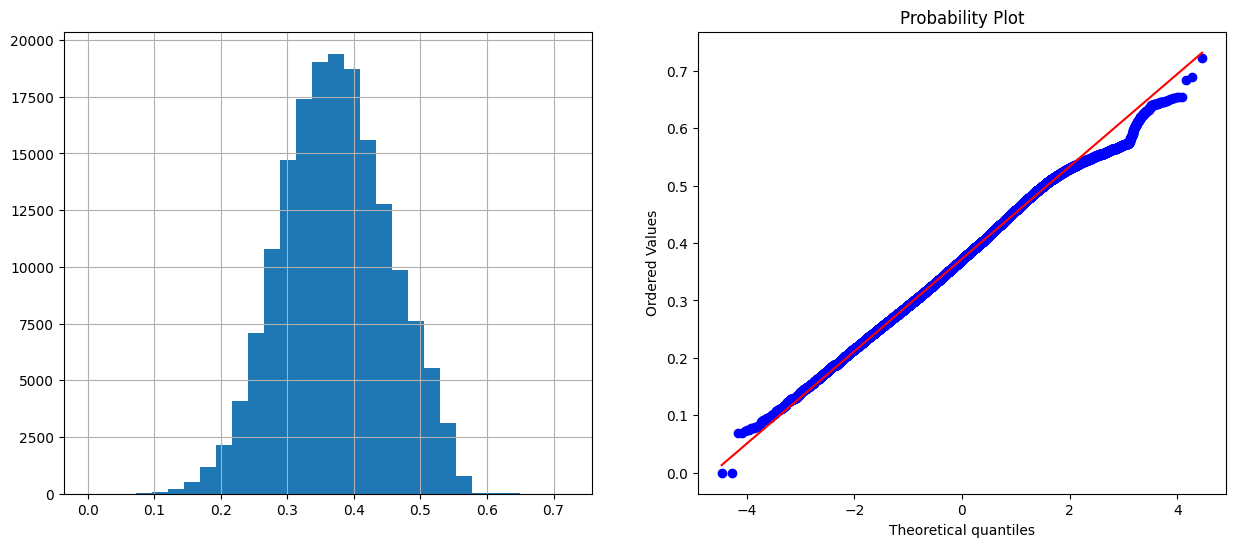

In [40]:
# Необходимо преобразовать данные к действительному типу
data_test['score_shk'] = data_num['score_shk'].astype('float')
data_test['score_shk'], param = stats.yeojohnson(data_test['score_shk']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data_test, 'score_shk')

## Исходное распределение

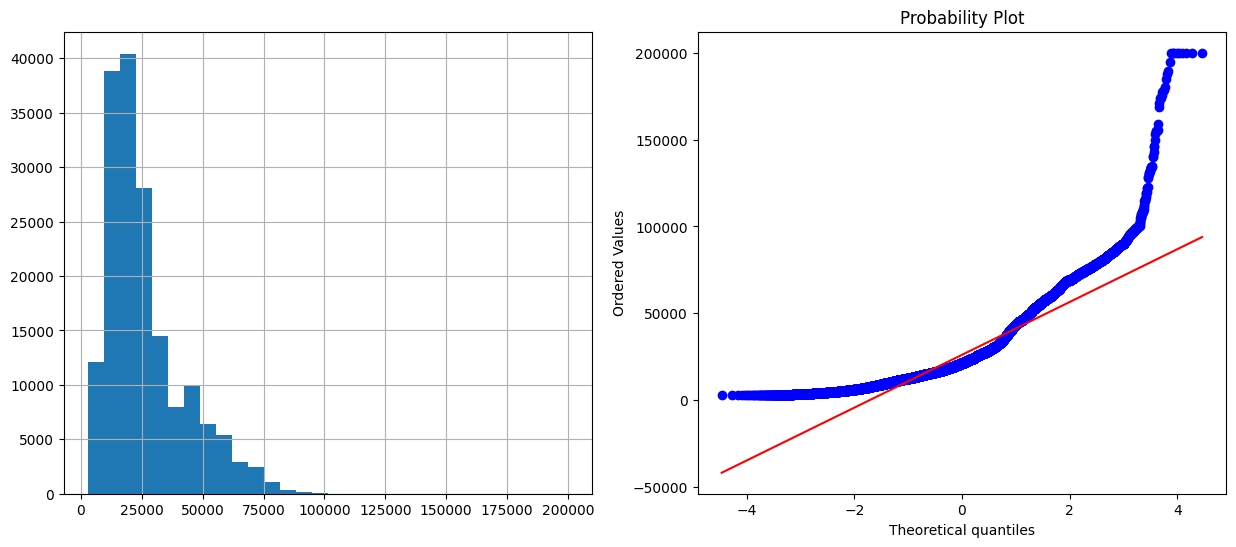

In [42]:
diagnostic_plots(data_num, 'credit_sum')

## Преобразование Бокса-Кокса

Оптимальное значение λ = 0.03849252583335171


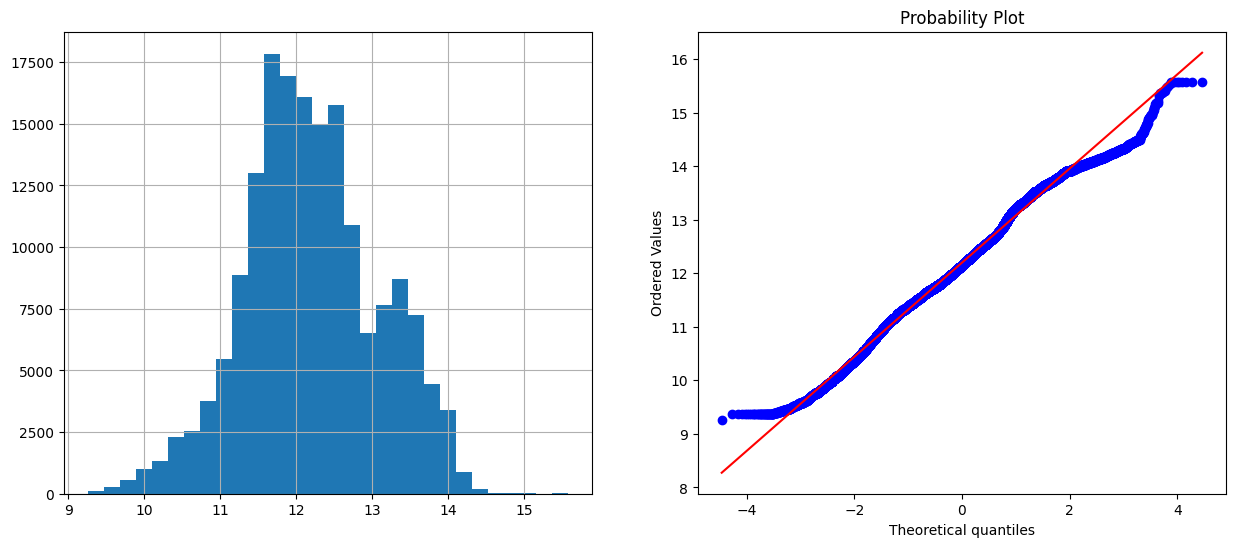

In [43]:
data_test['credit_sum'], param = stats.boxcox(data_num['credit_sum']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data_test, 'credit_sum')

## Итоги:
В результате нормализации наилучший результат получился с использованием преобразования Бокса-Кокса и Йео-Джонсона, что можно видеть по числовым характеристикам "суммы кредита" и "рейтинга клиента банка". Однако хорошо нормализовать характеристику "возраст" неудалось ни одним из приведенных методов.